In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
filepath = '/kaggle/input/google-playstore-apps/Google-Playstore.csv'
data = pd.read_csv(filepath, index_col=False)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-playstore-apps/Google-Playstore.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Introduction**
The data contains the following information:
Application data of available applications in the Google Play Store with the following 23 attributes:
* App Name
* App Id
* Category
* Rating
* Rating Count
* Installs
* Minimum Installs
* Maximum Installs
* Free
* Price
* Currency
* Size
* Minimum Android
* Developer Id
* Developer Website
* Developer Email
* Released
* Privacy Policy
* Last Updated
* Content Rating
* Ad Supported
* In app purchases
* Editor Choice

# **The Data At A Glance**

In [4]:
data.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [5]:
data.shape

(1118136, 23)

The current shape of our data is 1,1 million rows and 23 columns


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1118135 non-null  object 
 1   App Id             1118136 non-null  object 
 2   Category           1118133 non-null  object 
 3   Rating             1111286 non-null  float64
 4   Rating Count       1111286 non-null  float64
 5   Installs           1117975 non-null  object 
 6   Minimum Installs   1117975 non-null  float64
 7   Maximum Installs   1118136 non-null  int64  
 8   Free               1118136 non-null  bool   
 9   Price              1118136 non-null  float64
 10  Currency           1117975 non-null  object 
 11  Size               1118136 non-null  object 
 12  Minimum Android    1116123 non-null  object 
 13  Developer Id       1118134 non-null  object 
 14  Developer Website  703770 non-null   object 
 15  Developer Email    1118114 non-n

# **Preparing Data Set**

First of all we need to prepare our data for analysis. 
Let's:
- find out all the fields which have missing values and decide either to drop/fill or to ignore these values. 
- check for duplicates and remove them from data (if we will find them);
- change format of 'Last Updated', 'Released' columns to date time fromat;


In [7]:
data.isna().sum().sort_values(ascending=False)

Developer Website    414366
Privacy Policy       153524
Released               7730
Rating                 6850
Rating Count           6850
Minimum Android        2013
Installs                161
Minimum Installs        161
Currency                161
Developer Email          22
Category                  3
Developer Id              2
App Name                  1
Content Rating            0
Last Updated              0
In App Purchases          0
Ad Supported              0
Size                      0
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Editors Choice            0
dtype: int64

For our analysis we don't need information about 'Developer Website', 'Privacy Policy' so we can ignore these missing values and leave as-is.
Let's find % of missing values in each column by dividing data frame by length.

In [8]:
#data.isna().sum().sort_values(ascending=False)
round(data.isna().sum().sort_values(ascending=False)/len(data),4)

Developer Website    0.3706
Privacy Policy       0.1373
Released             0.0069
Rating               0.0061
Rating Count         0.0061
Minimum Android      0.0018
Installs             0.0001
Minimum Installs     0.0001
Currency             0.0001
Developer Email      0.0000
Category             0.0000
Developer Id         0.0000
App Name             0.0000
Content Rating       0.0000
Last Updated         0.0000
In App Purchases     0.0000
Ad Supported         0.0000
Size                 0.0000
App Id               0.0000
Price                0.0000
Free                 0.0000
Maximum Installs     0.0000
Editors Choice       0.0000
dtype: float64

The proportions of missing data in other columns are below 1%. In other words, the potential impact of the missing data is negligible, so the missing data may be ignored in the analysis. The next step is to check for duplicates:

In [9]:
data[data.duplicated(subset=['App Id'])]


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice


As we can see there are no duplicates in our data set. Therefore, we can move to the next point of data preparation. 
Now we will convert 'Last Updated', 'Released' columns to datetime format using pd.to_datetime() 


In [10]:
data['Released'] = pd.to_datetime(data['Released'])
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   App Name           1118135 non-null  object        
 1   App Id             1118136 non-null  object        
 2   Category           1118133 non-null  object        
 3   Rating             1111286 non-null  float64       
 4   Rating Count       1111286 non-null  float64       
 5   Installs           1117975 non-null  object        
 6   Minimum Installs   1117975 non-null  float64       
 7   Maximum Installs   1118136 non-null  int64         
 8   Free               1118136 non-null  bool          
 9   Price              1118136 non-null  float64       
 10  Currency           1117975 non-null  object        
 11  Size               1118136 non-null  object        
 12  Minimum Android    1116123 non-null  object        
 13  Developer Id       1118134 

First look at the features

Let's focus our analysis only on the selected features (Category, Rating, Reviews, Installs, and Price). In this notebook you can find we will answer these questions:
1. Which categories are rated best?
2. How do you visualize price distribution of paid apps?
3. How does the price distribution get affected by category?
4. What about paid apps Vs Free apps?
5. Are paid apps good enough?
6. As the size of the app increases do they get pricier?
7. How are the apps distributed category wise? can we split by paid category?
8. Do the categories affect the ratings?
9. Do price affect the ratings, reviews, or number of installs of the app?
10. Top 10 apps 

# **Category Distribution**

Let's look at the distribution of apps within the various categories:

In [11]:
data['Category'].value_counts()

Education                  115242
Music & Audio              104541
Entertainment               82079
Books & Reference           78969
Personalization             73538
Tools                       68953
Lifestyle                   54586
Business                    42210
Health & Fitness            31532
Productivity                30450
Photography                 28942
Travel & Local              25971
Puzzle                      24954
Finance                     24846
Food & Drink                24250
Sports                      22094
News & Magazines            21553
Casual                      20509
Shopping                    20440
Communication               18391
Arcade                      17715
Social                      16987
Simulation                  15372
Action                      12628
Medical                     12554
Art & Design                12322
Educational                 11351
Maps & Navigation           10468
Adventure                   10124
Video Players 

It is important to say that in Google Play Store are two different groups of categories: apps and games. Let's create two lists of categories for apps and games *(here you can find more infromation about categories: https://support.google.com/googleplay/android-developer/answer/9859673?hl=en)*

In [12]:
apps = ["Art & Design", "Auto & Vehicles", "Beauty", "Books & Reference", "Business", "Comics", "Communications", "Dating", "Education", "Entertainment", "Events", "Finance", "Food & Drink", "Health & Fitness", "House & Home", "Libraries & Demo", "Lifestyle", "Maps & Navigation", "Medical", "Music & Audio", "News & Magazines", "Parenting", "Personalization", "Photography", "Productivity", "Shopping", "Social", "Sports", "Tools", "Travel & Local", "Video Players & Editors", "Weather"]
games = ["Action", "Adventure", "Arcade", "Board", "Card", "Casino", "Casual", "Educational", "Music", "Puzzle", "Racing", "Role Playing", "Simulation", "Sports", "Strategy", "Trivia", "Word"]

data['Categories_group'] = np.where(data['Category'].isin(apps), 'apps', (np.where(data['Category'].isin(games), 'games', 'no infromation')))
data['Categories_group'].value_counts()

apps              946137
games             153605
no infromation     18394
Name: Categories_group, dtype: int64

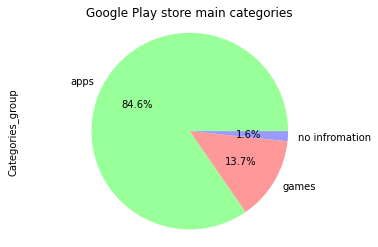

In [13]:
colors = ['#99ff99', '#ff9999','#9999ff']
data.Categories_group.value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%')
plt.title('Google Play store main categories')
plt.axis('equal')
plt.show()

#y = Ratinkind=''

As we can see category **'apps'** have the lion’s share of all Google Play Store apps with 84,62%, where 'games' have only 13,74%

In [14]:
data['Category'].value_counts()/len(data)*100

Education                  10.306617
Music & Audio               9.349578
Entertainment               7.340699
Books & Reference           7.062558
Personalization             6.576839
Tools                       6.166781
Lifestyle                   4.881875
Business                    3.775033
Health & Fitness            2.820051
Productivity                2.723282
Photography                 2.588415
Travel & Local              2.322705
Puzzle                      2.231750
Finance                     2.222091
Food & Drink                2.168788
Sports                      1.975967
News & Magazines            1.927583
Casual                      1.834213
Shopping                    1.828042
Communication               1.644791
Arcade                      1.584333
Social                      1.519225
Simulation                  1.374788
Action                      1.129380
Medical                     1.122761
Art & Design                1.102013
Educational                 1.015172
M


**Education** is the biggest category accounting for 10,3% (11 5242 apps) of all of the apps within the Google Play Store. Peranting is the smallest category - 0,16% (1784 apps).

# **Ratings Distribution**

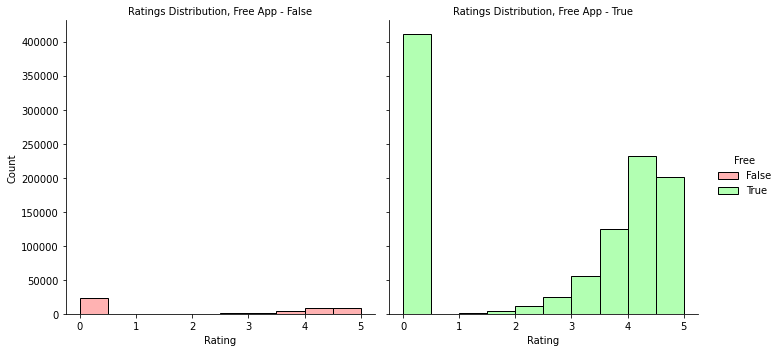

0.0    0.389877
4.2    0.047757
4.4    0.047526
4.3    0.045828
4.5    0.042409
4.6    0.041439
4.1    0.038480
4.0    0.036524
4.7    0.031682
5.0    0.030134
3.9    0.029966
3.8    0.028663
4.8    0.026951
3.7    0.022430
3.6    0.018343
4.9    0.016245
3.5    0.015877
3.4    0.014157
3.3    0.011006
3.2    0.010514
3.0    0.008061
3.1    0.007499
2.8    0.005609
2.9    0.005405
2.7    0.004194
2.6    0.004115
2.5    0.003016
2.4    0.002633
2.3    0.002414
2.2    0.002234
2.1    0.001665
2.0    0.001658
1.8    0.001340
1.9    0.001100
1.7    0.000791
1.6    0.000696
1.5    0.000490
1.4    0.000421
1.0    0.000320
1.3    0.000243
1.2    0.000204
1.1    0.000081
Name: Rating, dtype: float64

In [15]:

rd = sns.displot(data, x="Rating", kde=False, bins=10, col='Free', hue = 'Free', palette= {'#99ff99', '#ff9999'})
rd.set_titles("Ratings Distribution, Free App - {col_name}")

plt.show()

data['Free'].value_counts(normalize=True, ascending=False)
data['Rating'].value_counts(normalize=True, ascending=False)

Here we can see the distribution of user ratings for free and for paid apps. As we can see a lot of apps have a 0.0 rating it means that no one has rated the app yet When looking for an app, users will check the first few apps that show up in the search results and they will definitely check the rating of the app.

# **Ratings By Category**

In [16]:
round(data.describe())
#data.corr()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,1111286.0,1111286.0,1.117975e+06,1.118136e+06,1118136.0
mean,2.0,5160.0,3.136430e+05,5.444530e+05,0.0
std,2.0,272409.0,2.043941e+07,3.031058e+07,4.0
min,0.0,0.0,0.000000e+00,0.000000e+00,0.0
25%,0.0,0.0,1.000000e+02,1.600000e+02,0.0
50%,4.0,11.0,1.000000e+03,1.719000e+03,0.0
75%,4.0,100.0,1.000000e+04,1.911600e+04,0.0
max,5.0,125380770.0,1.000000e+10,1.077270e+10,400.0


data.groupby('Maximum Installs').sum()

In [21]:
#data.groupby('Category').sum()
